# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [1]:
#Saya menggunakan dataset yang disarankan pihak dicoding yaitu Wine Dataset for Clustering
# About Dataset
# This dataset is adapted from the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing the information about the types of wine for unsupervised learning.

# The following descriptions are adapted from the UCI webpage:

# These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

# The attributes are:

# -Alcohol
# -Malic acid
# -Ash
# -Alcalinity of ash
# -Magnesium
# -Total phenols
# -Flavanoids
# -Nonflavanoid phenols
# -Proanthocyanins
# -Color intensity
# -Hue
# -OD280/OD315 of diluted wines
# -Proline

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
# Memuat Dataset
data = pd.read_csv('wine_dataset.csv')  
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
# Cek missing values
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


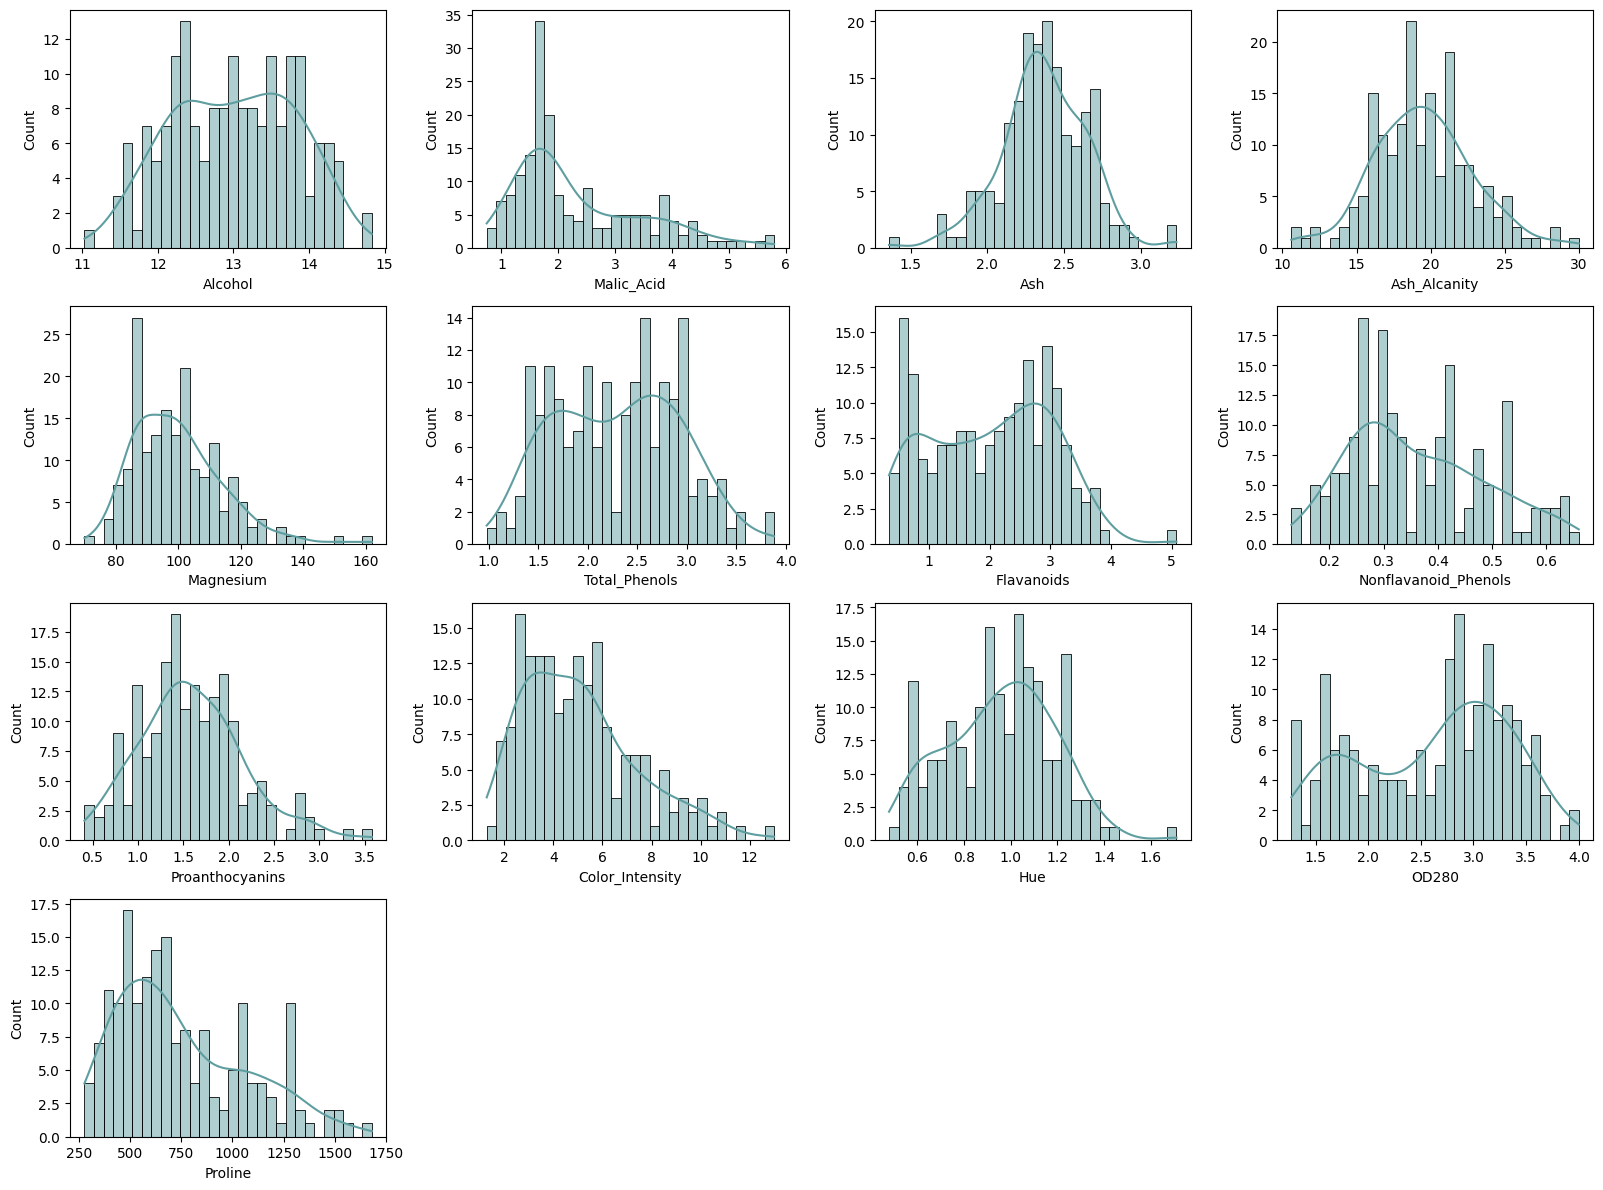

In [7]:
num_features = data.select_dtypes(include=[np.number])
num_columns = len(num_features.columns)
plt.figure(figsize=(16, 12))

rows = (num_columns // 4) + 1 
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(rows, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='#5F9EA0') 

plt.tight_layout()
plt.show()


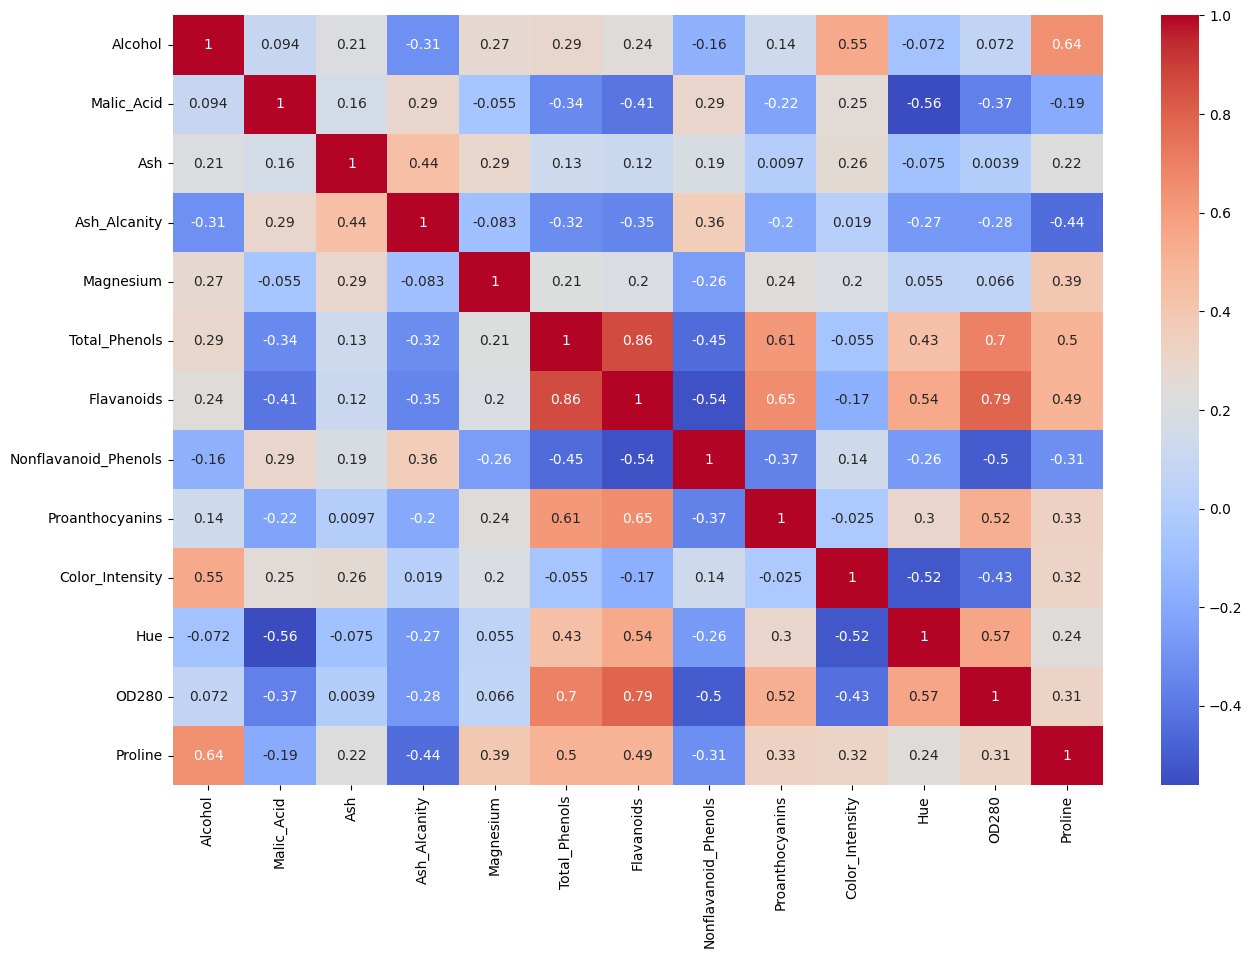

In [8]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(),cmap = "coolwarm",annot = True)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

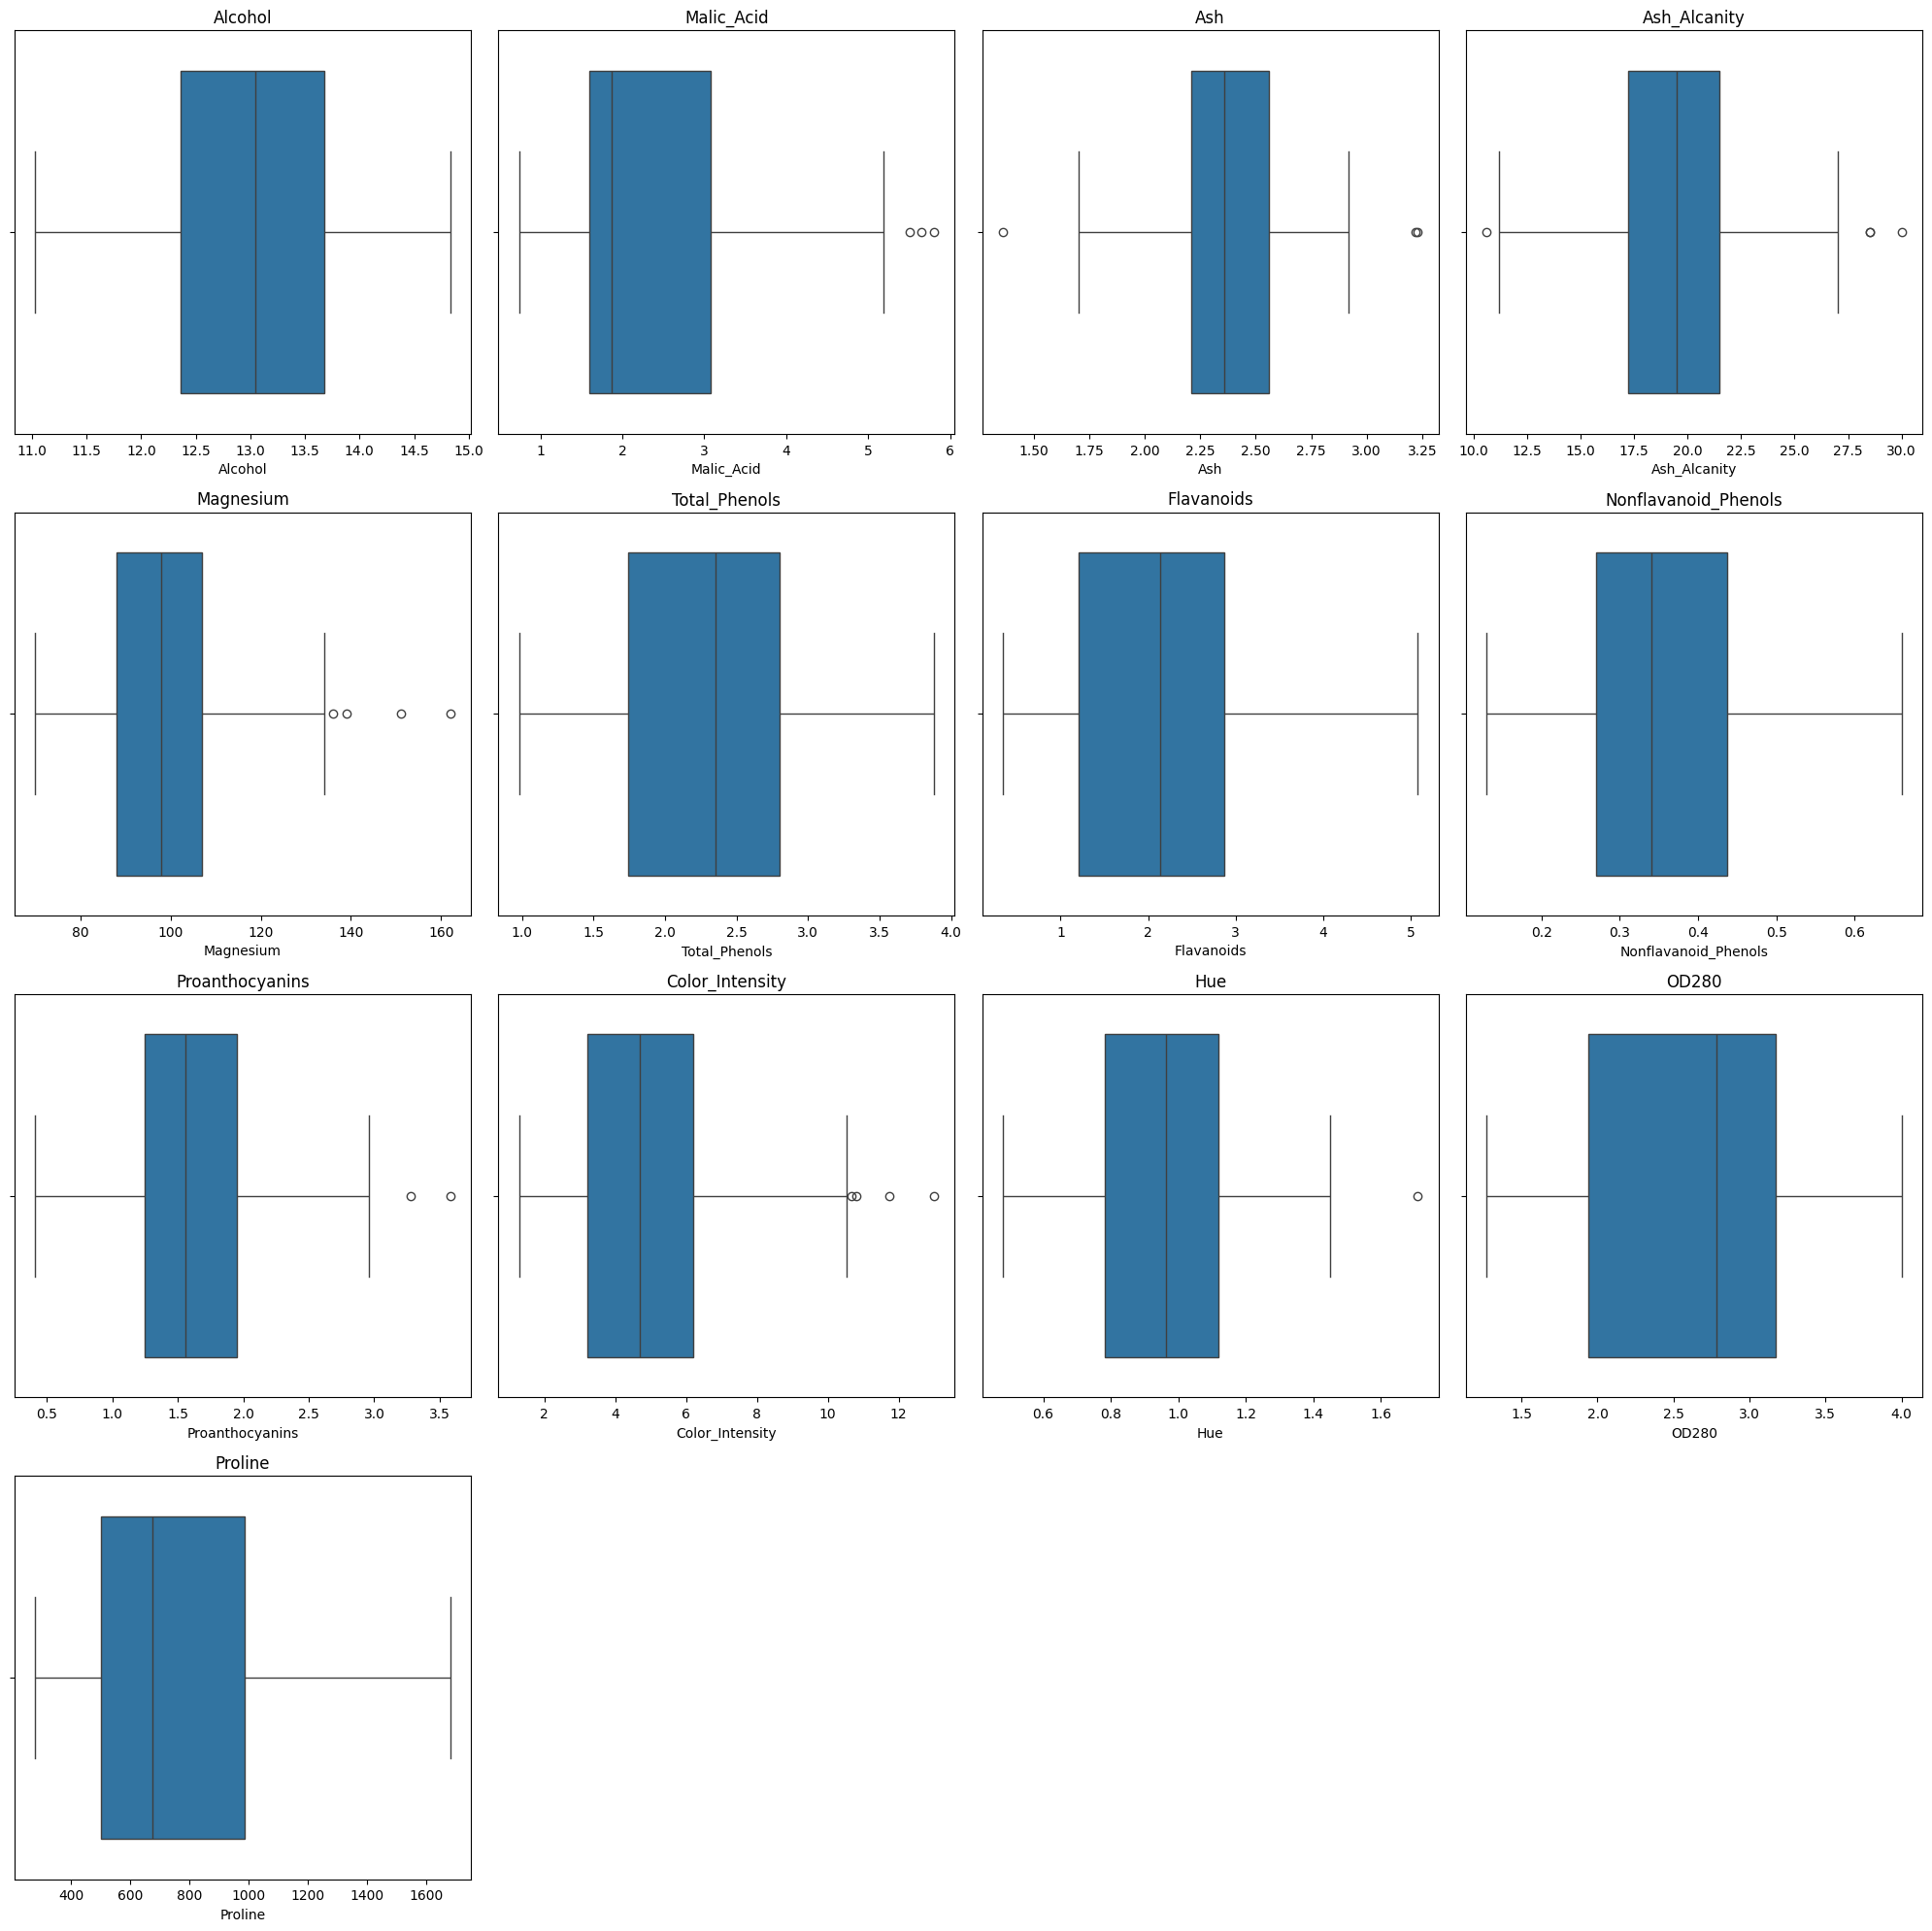

In [9]:
numeric_columns = [col for col in data.columns if data[col].dtype != 'object']
n_cols = 4  
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()  
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(col)

# Menghapus subplot kosong (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [10]:
for col in data.columns:
    if data[col].dtype != 'object':  
        Q1 = data[col].quantile(0.25)  
        Q3 = data[col].quantile(0.75)  

        # mencari iqr
        iqr = Q3 - Q1

        lower_bound = Q1 - 1.5 * iqr
        upper_bound = Q3 + 1.5 * iqr

        data[col] = np.where(data[col] > upper_bound, upper_bound,
                           np.where(data[col] < lower_bound, lower_bound, data[col]))

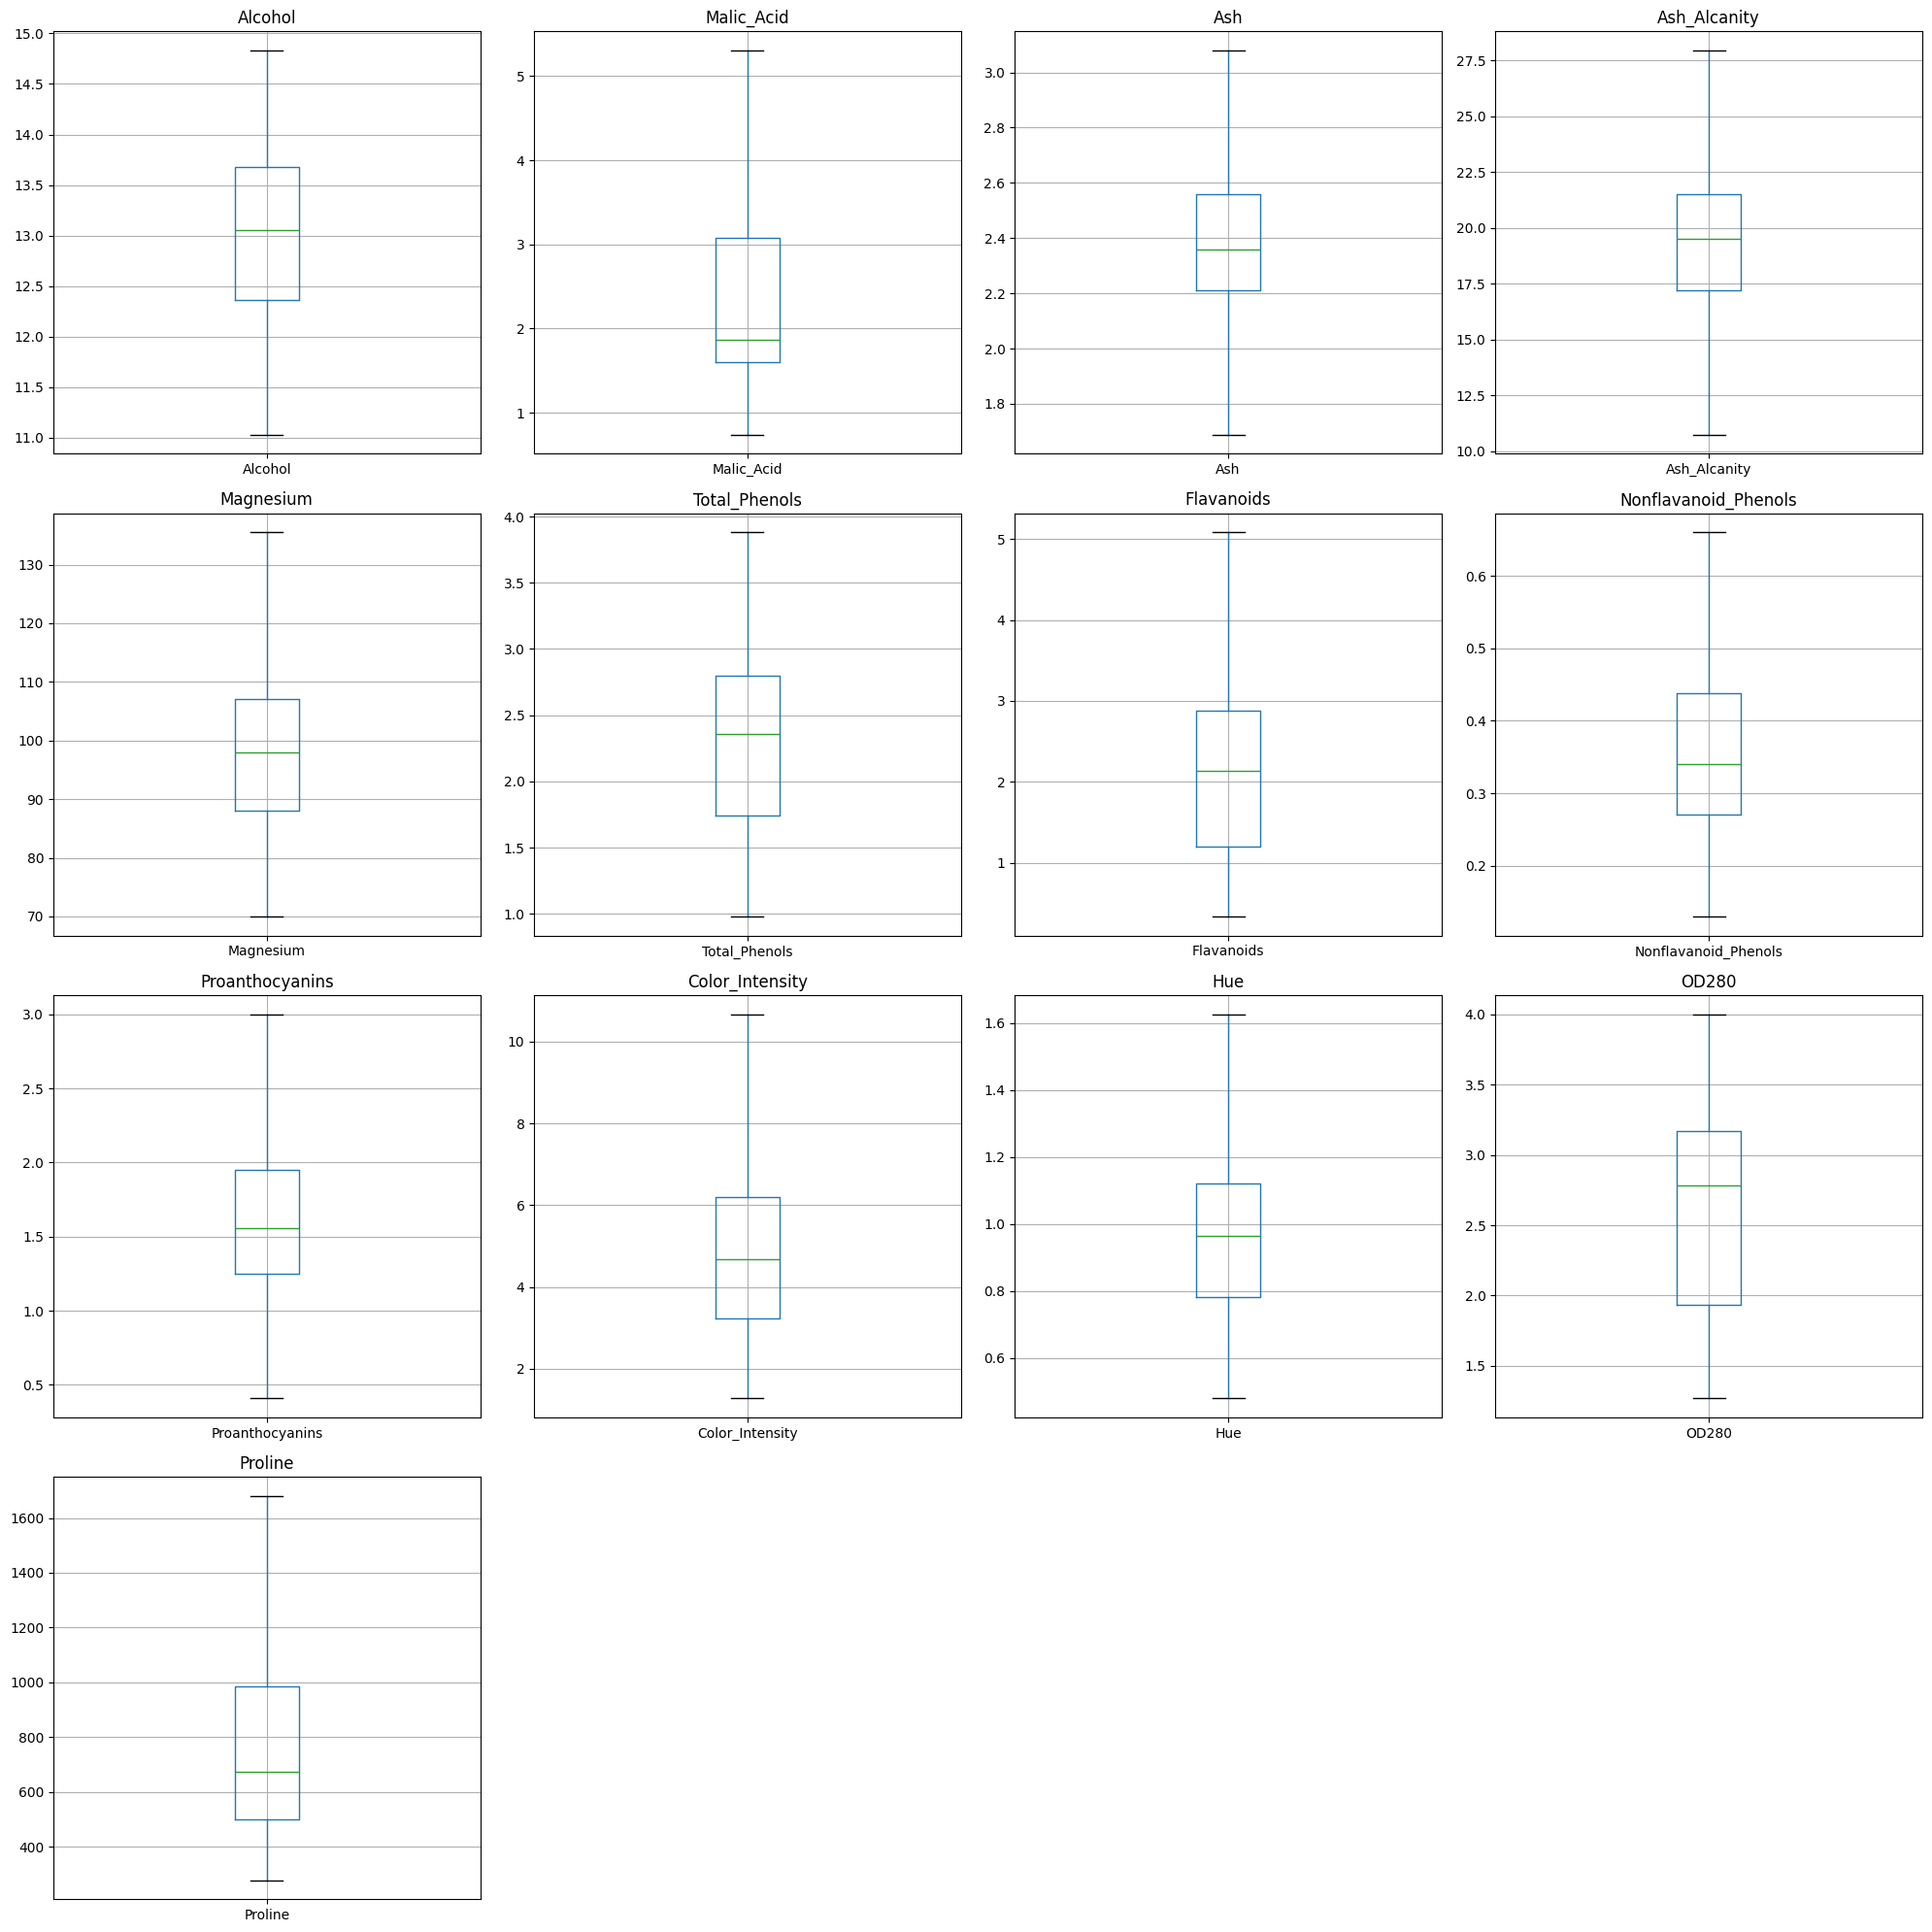

In [11]:
numeric_columns = [col for col in data.columns if data[col].dtype != 'object']
n_cols = 4  
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten() 

for i, col in enumerate(numeric_columns):
    data.boxplot(column=[col], ax=axes[i]) 
    axes[i].set_title(col)

# Menghapus subplot kosong (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

scaled_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

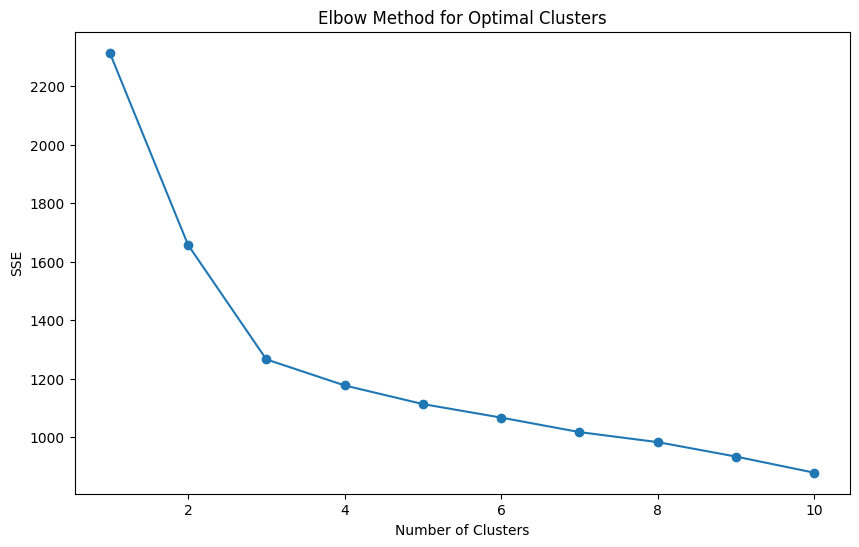

In [13]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Jumlah Kluster')
plt.ylabel('SSE')
plt.title('Elbow Method untuk Menentukan Jumlah Kluster Optimal')
plt.show()
     

In [14]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_data)
data['cluster'] = kmeans.labels_

data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

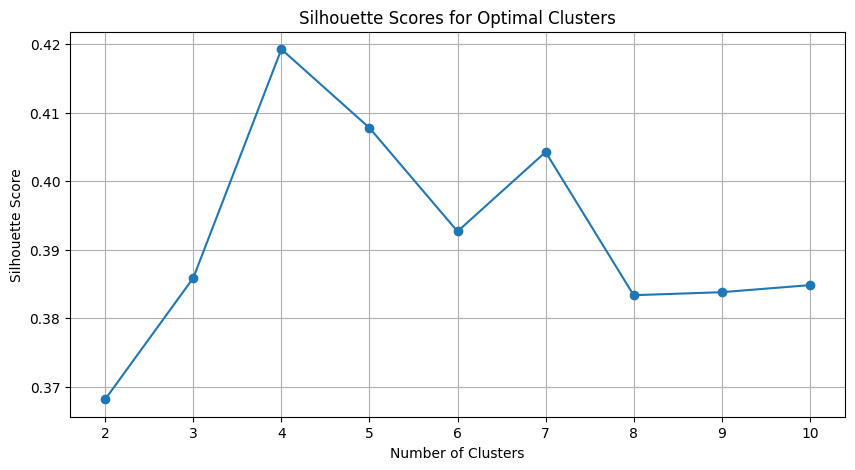

The highest silhouette score is 0.4193 for 4 clusters.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(0)
scaled_data = np.random.rand(200, 2)  

silhouette_scores = []
num_clusters_range = range(2, 11) 

for i in num_clusters_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    labels = kmeans.fit_predict(scaled_data)  
    score = silhouette_score(scaled_data, labels)  
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(num_clusters_range)
plt.grid(True)
plt.show()

max_score = max(silhouette_scores)
best_num_clusters = num_clusters_range[silhouette_scores.index(max_score)]

print(f"The highest silhouette score is {max_score:.4f} for {best_num_clusters} clusters.")


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [16]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

print(df_pca.head())

print("Ratio of explained variance: ", pca.explained_variance_ratio_)
print("Sum of explained variance: ", pca.explained_variance_ratio_.sum())

        PC1       PC2
0  0.206481  0.109429
1  0.027834  0.109923
2  0.177829 -0.030734
3  0.408262  0.056163
4 -0.234239  0.405946
Ratio of explained variance:  [0.52712618 0.47287382]
Sum of explained variance:  1.0


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

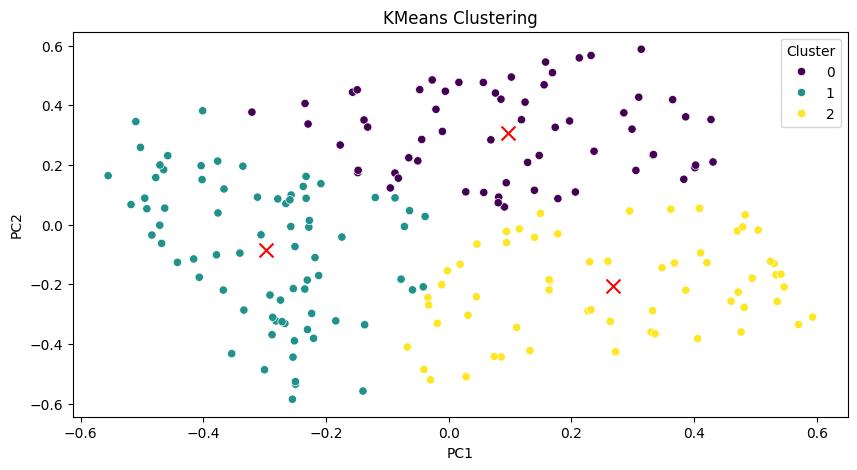

In [24]:
# KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_data)
df_pca['Cluster'] = kmeans.labels_

centroids = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100)
plt.title('KMeans Clustering')
plt.show()

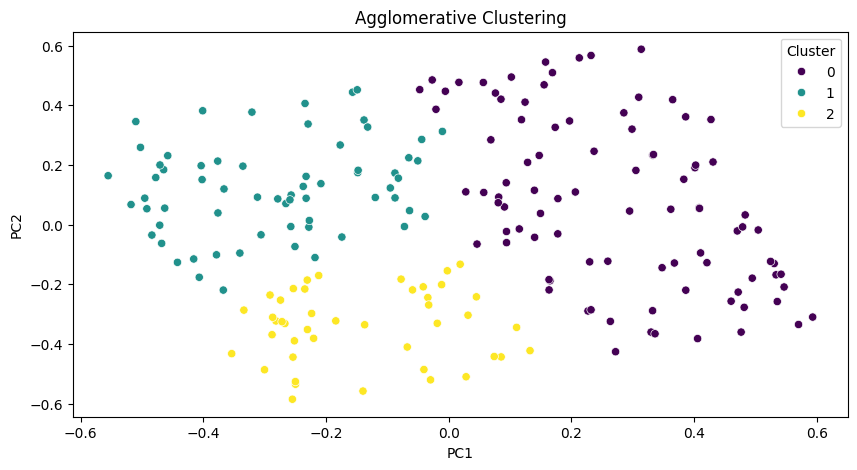

In [21]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
df_pca['Cluster'] = agg.fit_predict(scaled_data)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Agglomerative Clustering')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [25]:
cluster_summary = data.groupby('cluster').mean()
cluster_summary

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
cluster,,,,,,,,,,,,,
0,12.250923,1.889731,2.236288,20.056923,92.492308,2.247692,2.050000,0.357692,1.615231,2.973077,1.061419,2.803385,510.169231
1,13.134118,3.296373,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.165098,0.691961,1.696667,619.058824
2,13.676774,1.997903,2.461573,17.420968,107.483871,2.847581,3.003226,0.292097,1.917581,5.453548,1.065484,3.163387,1100.225806


### Cluster 0:
- **Alcohol**: Rata-rata 12.25, terendah di antara cluster, menunjukkan bahwa anggur dalam kelompok ini memiliki kadar alkohol yang lebih rendah.
- **Malic Acid**: Level moderat di 1.89, menunjukkan tingkat keasaman yang seimbang.
- **Flavanoids**: Rata-rata 2.05, menunjukkan kandungan flavonoid yang moderat, yang berkontribusi pada cita rasa.
- **Color Intensity**: Rendah di 2.97, menunjukkan warna anggur yang lebih terang dan mungkin memiliki profil rasa yang lebih ringan.
- **Proline**: Rata-rata 510, menunjukkan konsentrasi asam amino ini yang lebih rendah, yang terkait dengan intensitas rasa.

Cluster ini  mewakili anggur dengan profil rasa yang lebih ringan atau seimbang, dengan kadar alkohol dan keasaman yang moderat serta warna yang lebih terang.

### Cluster 1:
- **Alcohol**: 13.13, sedikit lebih tinggi dari Cluster 0, menunjukkan anggur yang sedikit lebih kuat.
- **Malic Acid**: Rata-rata tertinggi di 3.29, menunjukkan tingkat keasaman yang lebih tinggi.
- **Flavanoids**: Rata-rata rendah di 0.82, yang mungkin membuat rasa anggur di cluster ini tidak terlalu intens dibandingkan cluster lain.
- **Color Intensity**: Tertinggi di antara cluster dengan nilai 7.16, menunjukkan anggur dengan warna yang lebih gelap dan kemungkinan memiliki rasa yang lebih kuat.
- **Proline**: Rata-rata 619, menunjukkan konsentrasi yang moderat.

Cluster 1 mewakili anggur dengan keasaman dan intensitas warna yang lebih tinggi, yang menunjukkan profil rasa yang lebih tajam dan intens karena kandungan flavonoid yang lebih rendah.

### Cluster 2:
- **Alcohol**: Tertinggi di 13.68, menunjukkan anggur dengan kadar alkohol paling tinggi.
- **Malic Acid**: Lebih rendah di 1.99, menunjukkan tingkat keasaman yang lebih seimbang.
- **Flavanoids**: Rata-rata tinggi di 3.00, menunjukkan rasa dan aroma yang kaya.
- **Color Intensity**: 5.45, menunjukkan intensitas warna yang sedang, yang memberikan kemungkinan profil rasa yang kuat.
- **Proline**: Rata-rata tertinggi di 1100, menunjukkan konsentrasi asam amino yang tinggi yang berkontribusi pada kompleksitas rasa.

Cluster 2 mewakili anggur dengan profil paling intens dan kompleks, dengan kandungan alkohol, flavonoid, dan proline yang tinggi, yang menarik bagi mereka yang menyukai anggur dengan rasa penuh dan kaya.

---

**Ringkasan**:
- **Cluster 0**: Anggur dengan kadar alkohol moderat, keasaman seimbang, warna lebih terang, dan profil rasa lebih ringan.
- **Cluster 1**: Anggur dengan keasaman tinggi dan intensitas warna yang kuat namun flavonoid rendah, cenderung memiliki rasa yang tajam dan intens.
- **Cluster 2**: Anggur kaya dan kompleks dengan alkohol dan proline tinggi, keasaman seimbang, dan intensitas warna sedang, cocok bagi yang menyukai anggur dengan rasa penuh.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [20]:
data.to_csv('wine_clustered.csv', index=False)